# Execute the code below

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# You have now a DataFrame with lots of weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


In [3]:
pd.to_datetime(df_weather['DATE'])

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: DATE, Length: 365, dtype: datetime64[ns]

# Now, answer to the questions

## First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

There are lots of colors here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with MAX (in red) and MIN (in blue) Temperatures on the same graph, on Y-axis
- with Date on X-axis
- write legend, readable axis ticks, and title


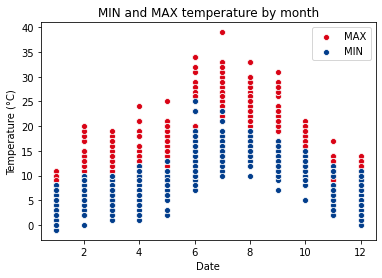

In [4]:
# First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

sns.scatterplot(x = df_weather["MONTH"], y = df_weather["MAX_TEMPERATURE_C"], color = '#D90416') 

sns.scatterplot(x = df_weather["MONTH"], y = df_weather["MIN_TEMPERATURE_C"], color = '#033E8C')  #You have to complete this code

plt.title('MIN and MAX temperature by month')
plt.legend(['MAX', 'MIN'])
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show() # Hey ! Why this ? I'm on seaborn, not on Matplotlib ! That's true, but Seaborn is just an overlay of Matplotlib,
#            it's like a shortcut for beautiful charts.
# Of course, you'll write legend, readable axis ticks, and title.

## Colorize with hue argument, to show the criterias of the opinion columns

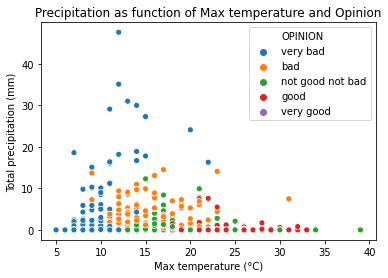

In [5]:
# Let's try to do some stuffs, what's hue ?
sns.scatterplot(x = "MAX_TEMPERATURE_C", y = "PRECIP_TOTAL_DAY_MM", hue = 'OPINION', data = df_weather) 


plt.title('Precipitation as function of Max temperature and Opinion')
plt.ylabel('Total precipitation (mm)')
plt.xlabel('Max temperature (°C)')
plt.show()

# Yeah, it's cool ! Did you notice that I changed a little the syntax ? I write "data =" to call the DataFrame
# Now, try to colorize, with hue, a scatterplot with MAX temperature on the X axis, PRECIPITATION (rain quantity) on the Y axis, and colorize with opinion.

# Of course, you'll write legend, readable axis ticks, and title.

## Correlation coefficient and heatmap - change the palette and interpretation

For your information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

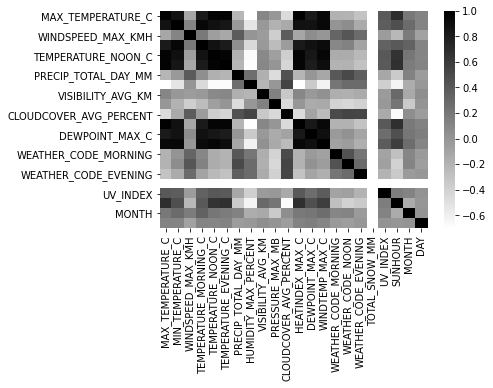

In [6]:
# Woh ! With only one line ! Powerfull !
sns.heatmap(df_weather.corr(), cmap = 'binary')
plt.show()
# Please change the palette (cmap) to a beautifull one.

# Hey, some columns seem to be missing. Do you understand why?


### Create a DataFrame with only high correlated columns with Max Temperature

In [0]:
# Then, can you read it ? What are the most correlated columns ? 
# Print a DataFrame with only columns correlated > 0.7 OR  < -0.7 with MAX temperature.
# You could begin with this method : df_weather.corr()

In [8]:
corrDF = df_weather.corr()
corrDF['MAX_TEMPERATURE_C'][(corrDF['MAX_TEMPERATURE_C'] > .7) | (corrDF['MAX_TEMPERATURE_C'] < -.7)]

MAX_TEMPERATURE_C        1.000000
MIN_TEMPERATURE_C        0.876892
TEMPERATURE_MORNING_C    0.825536
TEMPERATURE_NOON_C       0.975441
TEMPERATURE_EVENING_C    0.976796
HUMIDITY_MAX_PERCENT    -0.702905
HEATINDEX_MAX_C          0.993324
DEWPOINT_MAX_C           0.826719
WINDTEMP_MAX_C           0.941037
Name: MAX_TEMPERATURE_C, dtype: float64

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


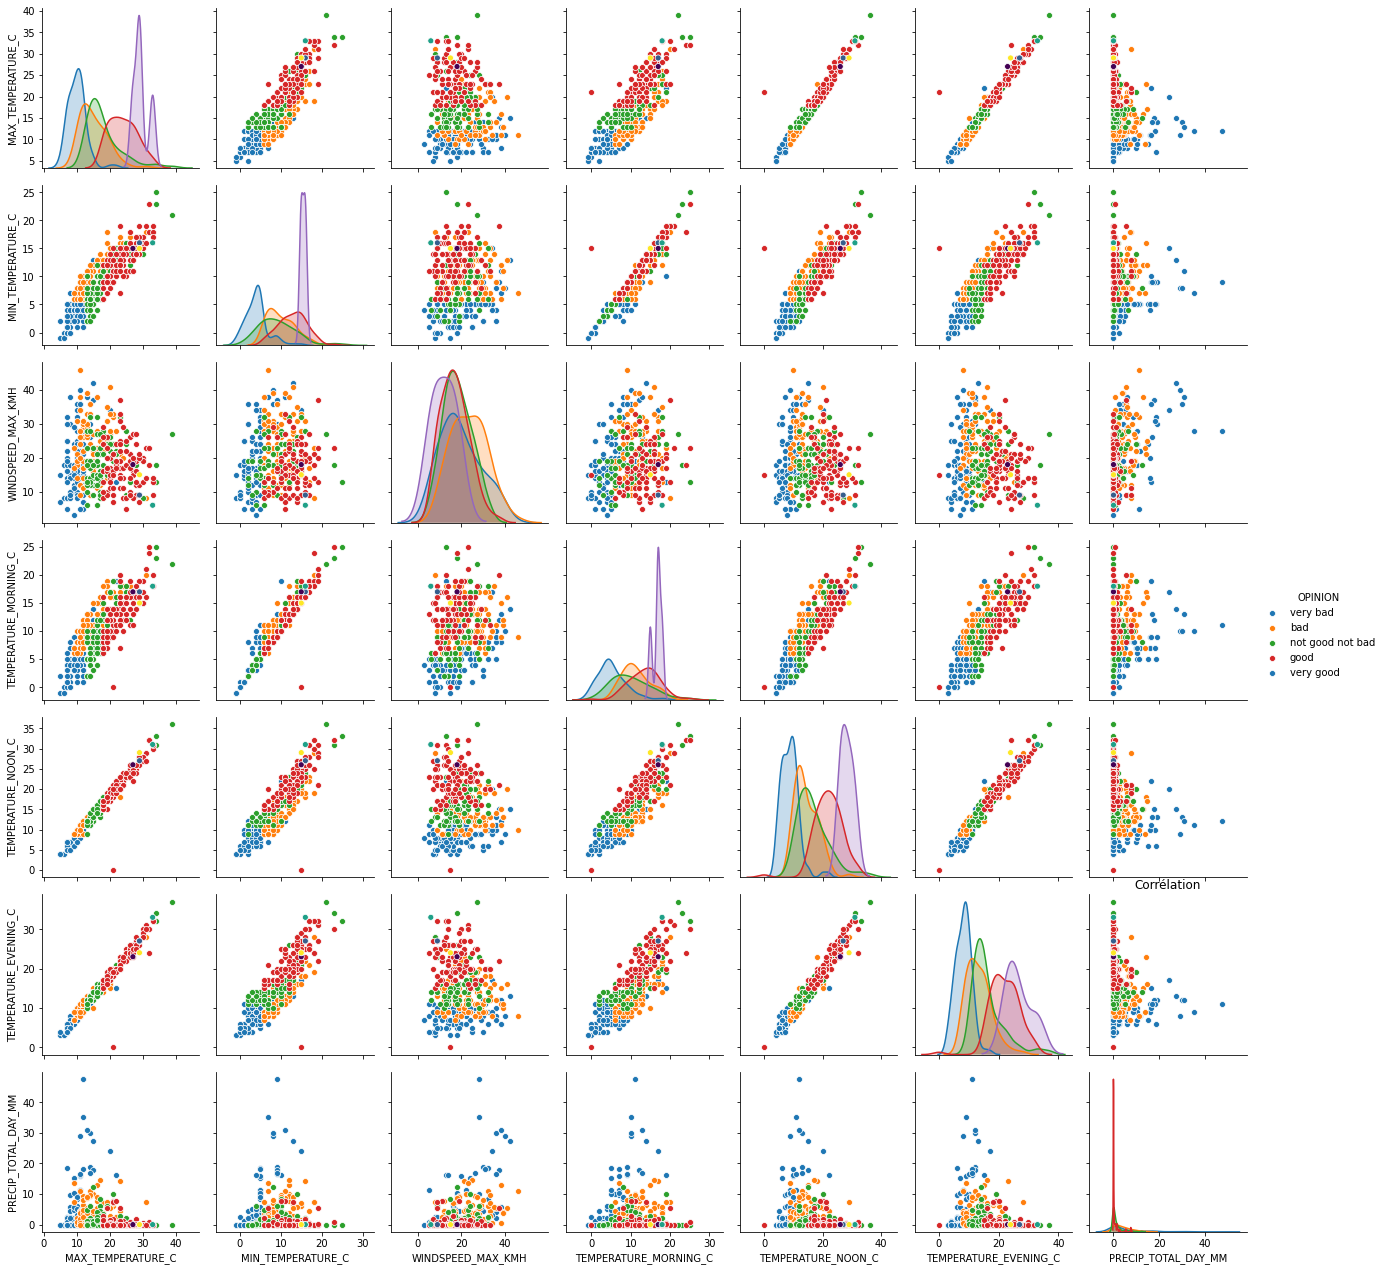

In [9]:
# No, don't tell me it works in one line ? Of course it is!
_ = sns.pairplot(pd.concat([df_weather.iloc[:,0:8],df_weather.iloc[:,-3]], axis = 1), hue = 'OPINION')
# Find a way to colorize your pairplot according to Opinion
_ = plt.title('Corrélation')
_ = plt.show()

### PairPlot only with high correlated columns with Max Temperature

In [10]:
# Rupération des varibles fortements corrélées: 
highCorrDF = pd.DataFrame(corrDF['MAX_TEMPERATURE_C'][(corrDF['MAX_TEMPERATURE_C'] > .7) | (corrDF['MAX_TEMPERATURE_C'] < -.7)])

colList = list(highCorrDF.index)

colList

['MAX_TEMPERATURE_C',
 'MIN_TEMPERATURE_C',
 'TEMPERATURE_MORNING_C',
 'TEMPERATURE_NOON_C',
 'TEMPERATURE_EVENING_C',
 'HUMIDITY_MAX_PERCENT',
 'HEATINDEX_MAX_C',
 'DEWPOINT_MAX_C',
 'WINDTEMP_MAX_C']

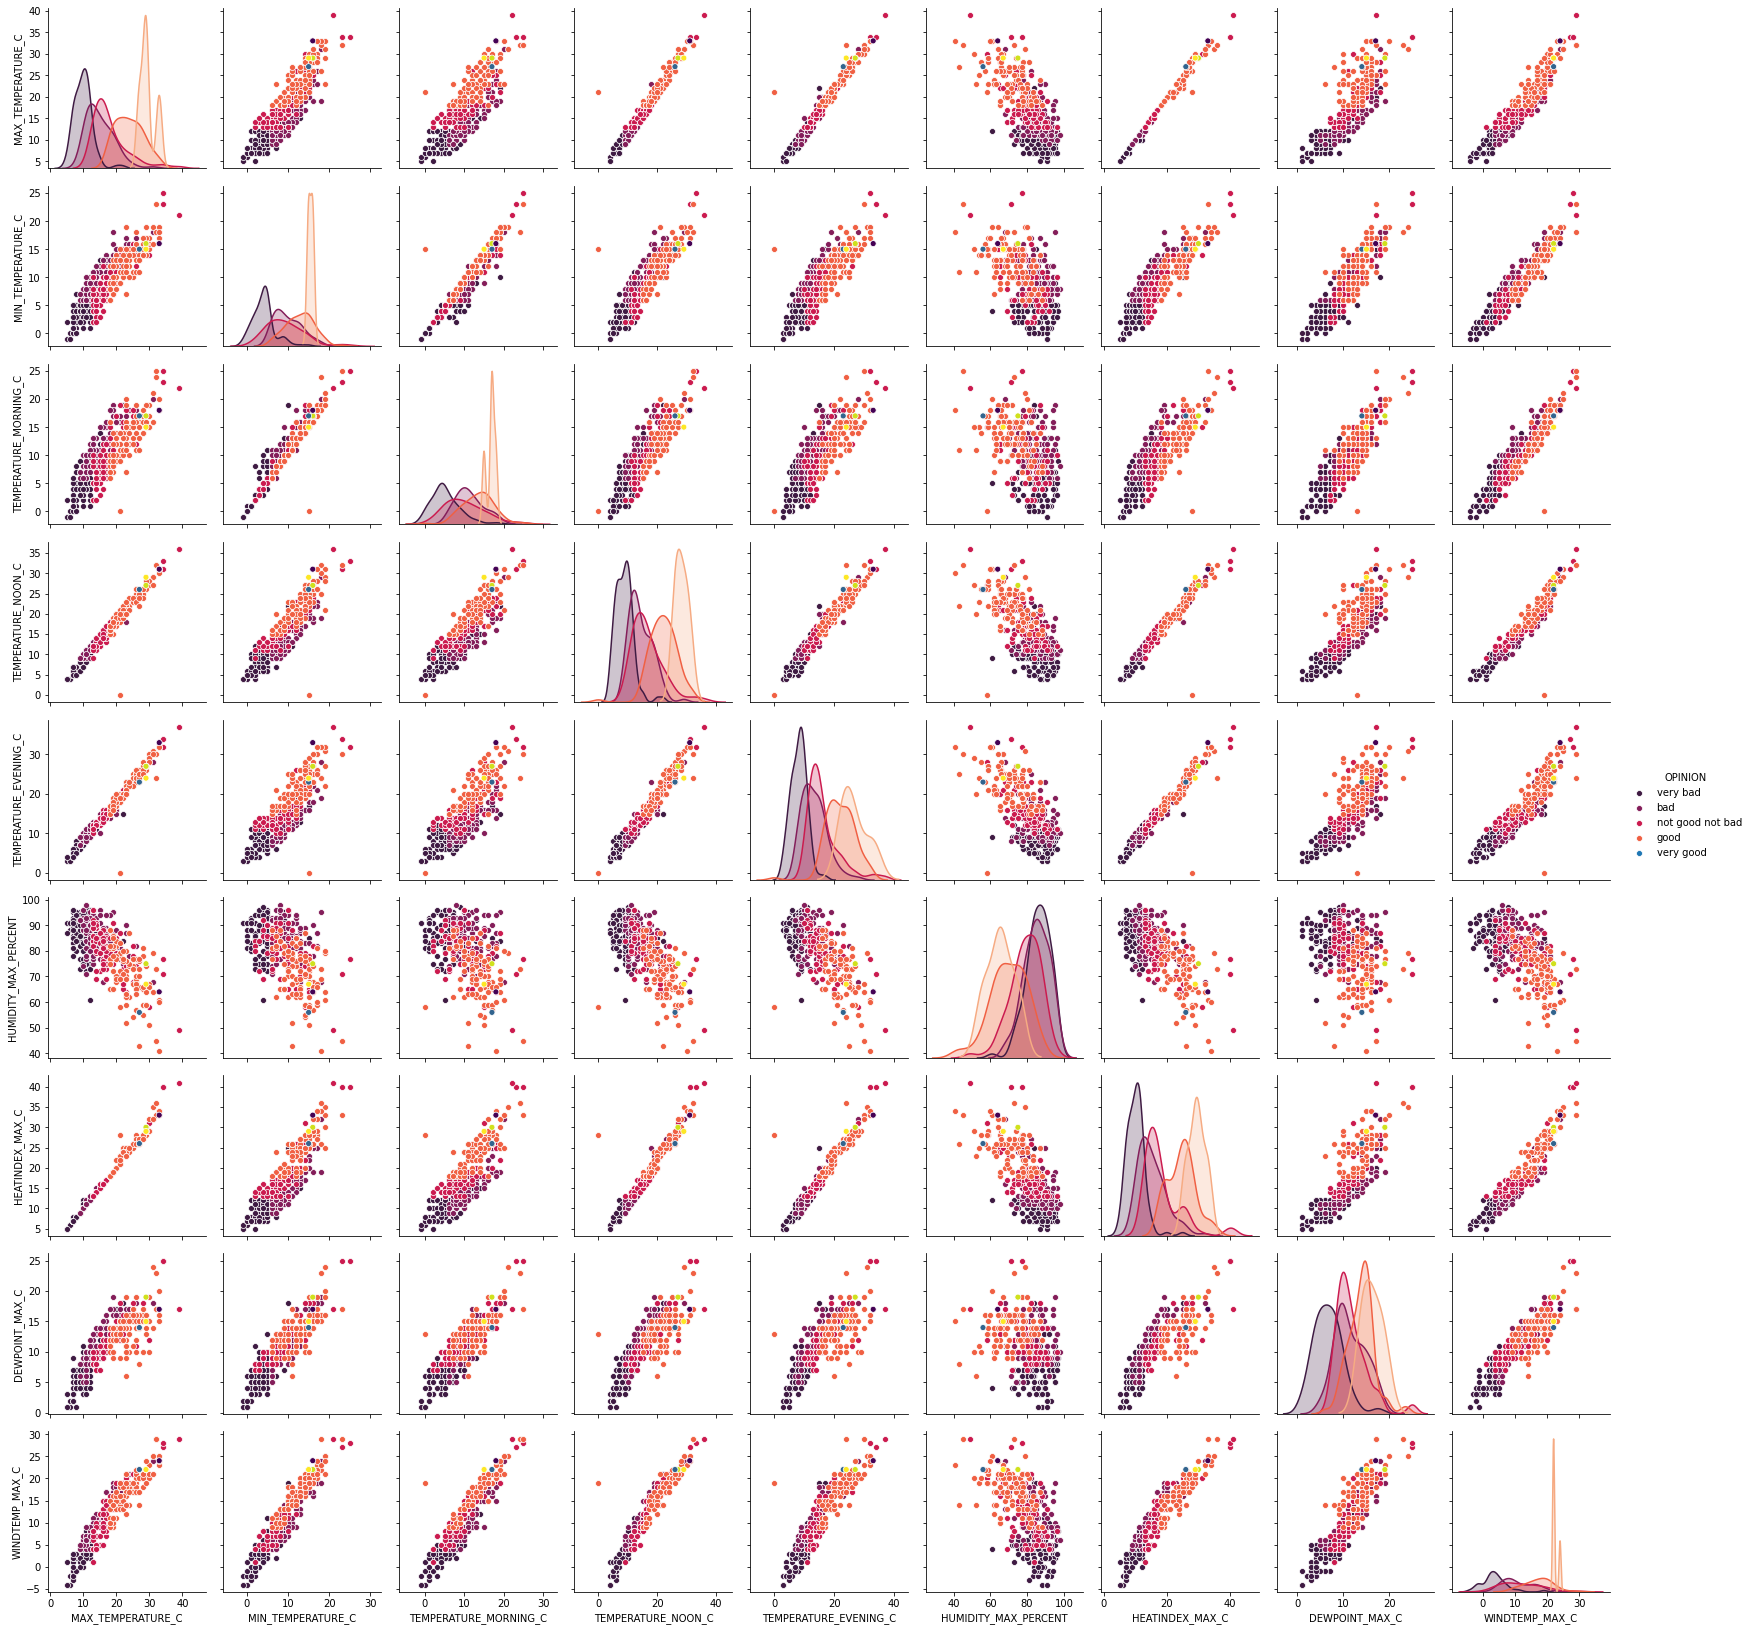

In [11]:
# Now, let's plot a pairplot with only the axis with high correlation with MAX Temperature (you have created the DataFrame above)
sns.pairplot(pd.concat([df_weather[colList], df_weather.iloc[:,-3]], axis = 1), hue = 'OPINION', palette = 'rocket')

# And add the opinion's color, and of course a title. You can change the palette for a beautifull one.
plt.show()

## Linear regression
Change of axis, for better correlated axes of your choice

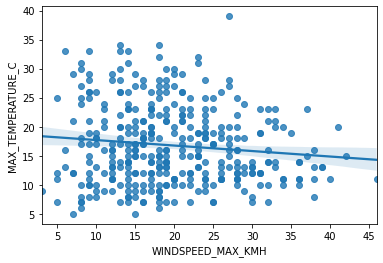

In [12]:
# Again in one line ! 
sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data= df_weather)
plt.show()
# Hummmm. Yes, technicaly, it works... But MAX temperature and Windspeed seems not well correlated...
# Hey, but you know lots of well-correlated axis. That's the moment to try !

### Linear regression with 2 columns correlated

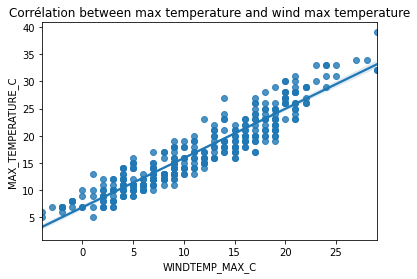

In [13]:
# Hop !
sns.regplot('WINDTEMP_MAX_C', 'MAX_TEMPERATURE_C', data= df_weather)
plt.title('Corrélation between max temperature and wind max temperature')
plt.show()

# More and more...
Draw 2 different charts of your choice, on the same figure, to represent which season has the better weather.

In [14]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [0]:
# Your code here
seasons = {'Winter':[12, 1, 2], 'Spring':[3, 4, 5], 'Summer':[6, 7, 8], 'Fall':[9, 10, 11]}
df_weather['Season'] = 0

for i in range(df_weather.shape[0]):
  for key, values in seasons.items():
    if df_weather.iloc[i, 22] in values:
      df_weather.iloc[i, 24] = key

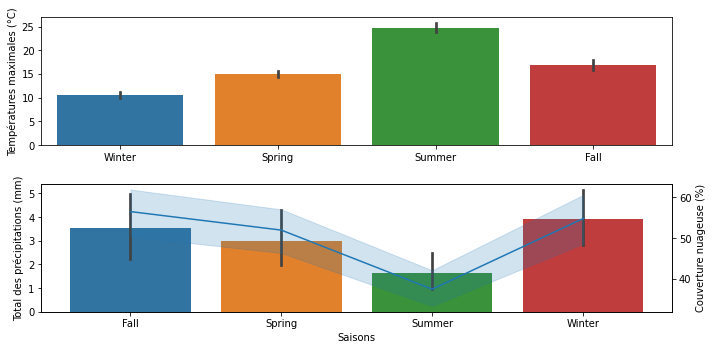

In [18]:
fig, ax = plt.subplots(figsize = (10,5))
ax1 = plt.subplot(211) 
sns.barplot('Season', 'MAX_TEMPERATURE_C', data = df_weather)
ax1.set(xlabel='', ylabel='Températures maximales (°C)')

ax2 = plt.subplot(212)
sns.barplot('Season', 'PRECIP_TOTAL_DAY_MM', data = df_weather)
ax2.set(xlabel='Saisons', ylabel='Total des précipitations (mm)')
ax3 = ax2.twinx()
sns.lineplot('Season', 'CLOUDCOVER_AVG_PERCENT', data = df_weather)
ax3.set(ylabel='Couverture nuageuse (%)')

fig.tight_layout()
plt.show()

# Is it the summer ? Woh, you're the best ! Now, challenge you with the other seaborn quests.